# **Genomic Data Analysis**

Dataset of gene counts:
[GTex](https://gtexportal.org/home/datasets) 

Working on subset of genes associated with the nervous system.

In [2]:
import os

from google.colab import drive
drive.mount('/content/drive')
!ls
root = '/content/drive/MyDrive/Tempus/'
os.chdir(root)

Mounted at /content/drive
drive  sample_data


In [3]:

import pandas as pd
df = pd.read_csv("GTEX.nerve_samples.PMC5359387.tsv", sep='\t')
df.drop(['Name','Description'], 1, inplace= True)

In [4]:
df.head()

,GTEX.111CU.2226.SM.5N9G5,GTEX.111FC.0526.SM.5GZZ8,GTEX.111VG.2526.SM.5GZXP,GTEX.111YS.2126.SM.5EGGM,GTEX.113IC.0526.SM.5HL76,GTEX.117YX.2426.SM.5GZZJ,GTEX.1192X.0326.SM.5H11U,GTEX.11DXW.0426.SM.5H12E,GTEX.11DXX.2526.SM.5H119,GTEX.11DXZ.2526.SM.5N9BG,GTEX.11DYG.0426.SM.5987J,GTEX.11EI6.0426.SM.5EQ43,GTEX.11EQ9.2326.SM.5HL5H,GTEX.11GS4.2826.SM.5HL56,GTEX.11GSO.2626.SM.5Q5AK,GTEX.11GSP.2826.SM.5A5LK,GTEX.11H98.0426.SM.5HL55,GTEX.11LCK.1326.SM.5Q5AN,GTEX.11NSD.1826.SM.5N9CF,GTEX.11NUK.0426.SM.5HL5V,GTEX.11O72.0526.SM.5Q5AO,GTEX.11OC5.0526.SM.5N9EE,GTEX.11ONC.2326.SM.5HL6P,GTEX.11P7K.2226.SM.5GU56,GTEX.11P81.2626.SM.5GU6T,GTEX.11P82.1926.SM.5Q5AU,GTEX.11PRG.0126.SM.5BC55,GTEX.11TT1.2626.SM.5EGL2,GTEX.11TTK.0426.SM.5EQLT,GTEX.11UD2.0426.SM.5EQ5W,GTEX.11VI4.2126.SM.5EGI1,GTEX.11WQC.2826.SM.5GU7A,GTEX.11XUK.2326.SM.5CVLM,GTEX.11ZU8.2626.SM.5EQLL,GTEX.11ZUS.1226.SM.5FQU8,GTEX.11ZVC.2826.SM.5FQTC,GTEX.1211K.2326.SM.5FQU7,GTEX.12126.0626.SM.5Q5AQ,GTEX.1212Z.2726.SM.5EQ59,GTEX.12584.0326.SM.59HK2,...,GTEX.YF7O.2626.SM.5IFHK,GTEX.YFC4.0826.SM.5CVM1,GTEX.YJ8A.0726.SM.5Q5A6,GTEX.YJ8O.2626.SM.5HL8H,GTEX.Z93S.0826.SM.5HL7Y,GTEX.Z9EW.2026.SM.5CVMQ,GTEX.ZA64.2126.SM.5Q5A8,GTEX.ZAB4.1826.SM.5HL8O,GTEX.ZAKK.0526.SM.5EGHC,GTEX.ZC5H.0526.SM.5HL9E,GTEX.ZDTS.0326.SM.5HL83,GTEX.ZDXO.1926.SM.5E45Q,GTEX.ZDYS.1526.SM.4WKFY,GTEX.ZF29.2626.SM.4WWBA,GTEX.ZF2S.2526.SM.5CVNT,GTEX.ZGAY.0826.SM.4WWEP,GTEX.ZLV1.2026.SM.5EQMB,GTEX.ZLWG.2526.SM.57WDS,GTEX.ZP4G.2226.SM.57WFB,GTEX.ZPCL.2426.SM.57WFP,GTEX.ZQG8.1326.SM.51MQW,GTEX.ZQUD.1226.SM.51MSP,GTEX.ZT9X.2126.SM.57WEV,GTEX.ZTPG.0526.SM.5O98W,GTEX.ZTX8.1726.SM.51MSB,GTEX.ZV68.0326.SM.59HJG,GTEX.ZVE2.0426.SM.59HJ7,GTEX.ZVT3.0326.SM.5GU6U,GTEX.ZVTK.0826.SM.5GZXI,GTEX.ZVZO.0526.SM.5A5LB,GTEX.ZVZP.2626.SM.51MR4,GTEX.ZXES.1926.SM.5E445,GTEX.ZXG5.0426.SM.5GICT,GTEX.ZYFC.0626.SM.5GIDR,GTEX.ZYFD.0426.SM.5E45X,GTEX.ZYFG.2526.SM.5GIEK,GTEX.ZYT6.1426.SM.5E43U,GTEX.ZYVF.0726.SM.5GICF,GTEX.ZYW4.0326.SM.5E44Y,GTEX.ZZ64.1426.SM.5NQ8C
0,5.6150,5.5870,4.4530,6.6080,5.8990,4.3060,5.8390,7.5210,2.2170,6.037,5.906,7.4250,5.7500,6.1480,7.489,6.6490,6.4150,5.415,7.865,4.810,7.6360,4.6370,4.3750,5.4690,7.6300,4.5900,7.356,5.9760,7.3490,6.8200,5.832,7.910,6.1900,6.5170,5.950,5.3570,5.5630,6.065,8.064,4.7170,...,6.1430,5.699,5.80700,6.658,7.279,6.658,5.8360,8.177,5.655,6.234,6.8410,4.693,6.570,5.092,5.557,5.668,5.6190,7.0390,6.286,5.4840,4.8230,4.142,6.773,6.5420,5.7230,5.6630,7.6880,7.329,6.115,5.476,4.4460,5.563,6.7610,6.331,5.587,5.045,6.233,9.1030,7.5160,6.2010
1,11.3100,24.6000,13.9700,13.7100,12.4800,14.0400,15.9100,21.4200,8.3040,18.890,23.820,23.6600,19.4300,11.8000,22.400,17.3000,18.9600,15.340,17.220,22.280,11.1000,21.2700,13.0900,17.1300,31.6600,8.6740,16.140,20.2500,23.5300,16.7400,16.760,15.430,19.6100,12.9700,21.810,13.5300,12.7800,16.360,19.770,24.6600,...,12.5900,12.950,14.91000,18.490,16.520,11.390,14.1400,15.780,14.190,16.540,12.5700,10.810,22.260,13.470,16.580,14.230,15.1300,14.7400,18.480,9.3900,18.9100,18.980,15.230,9.6030,14.8300,22.9000,12.3700,21.500,17.930,14.190,14.7600,16.070,10.1600,17.520,15.070,11.190,17.870,15.6400,20.8900,13.1400
2,1.1770,10.9900,9.8680,6.8760,15.7800,9.9950,6.3120,13.7500,3.8190,7.076,17.430,5.0520,3.5360,6.9280,6.460,9.5670,4.3120,6.939,5.467,5.929,8.2050,7.0460,12.4100,2.3310,6.0480,2.6140,8.081,0.8150,6.3170,6.5900,4.446,12.260,6.5520,10.6800,10.340,11.2600,5.6080,4.673,16.060,3.5200,...,4.0620,12.140,4.05600,7.743,7.064,4.548,6.2690,2.263,6.582,3.728,8.8950,6.331,5.055,3.930,6.612,4.754,3.3430,3.5900,1.992,3.4590,6.1350,9.991,8.239,1.5640,5.8080,2.7520,1.9880,12.740,5.570,4.160,6.0280,3.083,8.5770,16.370,11.110,2.169,7.034,1.3000,4.2780,3.1690
3,36.4300,56.4100,42.4200,40.8900,35.4100,28.9900,46.0700,39.0800,30.4600,40.250,37.410,47.2600,41.2800,32.9600,37.980,48.8900,31.8100,38.790,38.600,39.800,42.8100,41.0700,39.5700,37.3900,51.0000,24.6200,43.220,25.9400,44.2000,35.2600,38.650,51.670,35.0800,39.9200,49.300,40.1000,35.2200,64.850,38.180,45.1800,...,42.8100,43.600,39.47000,52.440,46.2

In [5]:
a = pd.read_csv('annotations.tsv', sep= '\t', index_col= 'SAMPID')
a.head(1)

,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMUBRID,SMTSISCH,SMTSPAX,SMNABTCH,SMNABTCHT,SMNABTCHD,SMGEBTCH,SMGEBTCHD,SMGEBTCHT,SMAFRZE,SMGTC,SME2MPRT,SMCHMPRS,SMNTRART,SMNUMGPS,SMMAPRT,SMEXNCRT,SM550NRM,SMGNSDTC,SMUNMPRT,SM350NRM,SMRDLGTH,SMMNCPB,SME1MMRT,SMSFLGTH,SMESTLBS,SMMPPD,SMNTERRT,SMRRNANM,SMRDTTL,SMVQCFL,SMMNCV,SMTRSCPT,SMMPPDPR,SMCGLGTH,SMGAPPCT,SMUNPDRD,SMNTRNRT,SMMPUNRT,SMEXPEFF,SMMPPDUN,SME2MMRT,SME2ANTI,SMALTALG,SME2SNSE,SMMFLGTH,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
SAMPID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F-0003-SM-58Q7G,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,BP-38516,DNA isolation_Whole Blood_QIAGEN Puregene (Man...,05/02/2013,LCSET-4574,01/15/2014,Standard Exome Sequencing v3 (ICE),WES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**1. Calculate the correlations among the genes in the file. If you get any warnings from R or python when doing this, give a brief explanation of why and a solution (in code) that avoids the warnings** 


In [6]:
# Calculating Pearson Correlation

from scipy.stats.stats import pearsonr
import itertools
correlations = {}
columns = df.columns.tolist()

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + col_b] = pearsonr(df.loc[:, col_a], df.loc[:, col_b])

result = pd.DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']


**2. What are the top 10 pairs of most correlated genes? What are the 10 pairs of most anti-correlated
genes? Write a function that takes the input data and can return either correlated or anti-correlated
gene pairs, and an arbitrary number of pairs.**


In [7]:
# Top 10 Highly Correlated Genes
result1 = result.sort_values('PCC',ascending= False,key=abs).head(10)
result1

,PCC,p-value
GTEX.14JG6.1926.SM.6LLIG__GTEX.17F98.0826.SM.7DUF7,0.993856,0.0
GTEX.14JG6.1926.SM.6LLIG__GTEX.1I4MK.1926.SM.B2LVQ,0.993535,0.0
GTEX.1I6K7.0426.SM.CGQFN__GTEX.XPT6.2126.SM.4B66P,0.993181,0.0
GTEX.OIZF.1726.SM.7PC3H__GTEX.ZF2S.2526.SM.5CVNT,0.992757,0.0
GTEX.145LU.0726.SM.5QGP2__GTEX.14E7W.0426.SM.5S2O4,0.992509,0.0
GTEX.XPT6.2126.SM.4B66P__GTEX.ZTX8.1726.SM.51MSB,0.992300,0.0
GTEX.17HHY.0626.SM.7EPGF__GTEX.1CB4G.0626.SM.7PC3P,0.992205,0.0
GTEX.R55D.0526.SM.EWRM3__GTEX.XQ8I.0726.SM.4BOPU,0.992134,0.0
GTEX.13PL7.1926.SM.5J1MM__GTEX.PLZ6.1726.SM.2S1O6,0.992039,0.0
GTEX.1JKYN.1926.SM.CMKH1__GTEX.PLZ6.1726.SM.2S1O6,0.991941,0.0


In [8]:
# Top 10 Lowly Correlated Genes
result.sort_values('PCC', key = abs).head(10)

,PCC,p-value
GTEX.1H2FU.0326.SM.9WYSV__GTEX.ZYVF.0726.SM.5GICF,0.500207,2.122444e-93
GTEX.1HFI7.2126.SM.CE6QT__GTEX.ZYVF.0726.SM.5GICF,0.514565,1.239202e-99
GTEX.14PHY.2626.SM.62LF8__GTEX.WOFM.1626.SM.3MJFX,0.516395,1.893365e-100
GTEX.183WM.0526.SM.731BD__GTEX.ZYVF.0726.SM.5GICF,0.517140,8.782141e-101
GTEX.14PHY.2626.SM.62LF8__GTEX.1H2FU.0326.SM.9WYSV,0.524542,3.825101e-104
GTEX.WOFM.1626.SM.3MJFX__GTEX.ZYVF.0726.SM.5GICF,0.525881,9.240600e-105
GTEX.1KANA.0226.SM.DIPF8__GTEX.ZYVF.0726.SM.5GICF,0.531573,2.053916e-107
GTEX.14PHY.2626.SM.62LF8__GTEX.1HFI7.2126.SM.CE6QT,0.531688,1.812638e-107
GTEX.14PHY.2626.SM.62LF8__GTEX.1LGOU.1826.SM.D3LAL,0.535651,2.399332e-109
GTEX.14PHY.2626.SM.62LF8__GTEX.1KANA.0226.SM.DIPF8,0.536309,1.163911e-109


In [9]:
# Function to get high/low correlated genes given a arbitary number
def func1(result, n, flag):

  if flag == 'high':
    return result.sort_values('PCC',ascending= False).head(n)
  return result.sort_values('PCC').head(n)



In [10]:
func1(result, 5, 'high')

,PCC,p-value
GTEX.14JG6.1926.SM.6LLIG__GTEX.17F98.0826.SM.7DUF7,0.993856,0.0
GTEX.14JG6.1926.SM.6LLIG__GTEX.1I4MK.1926.SM.B2LVQ,0.993535,0.0
GTEX.1I6K7.0426.SM.CGQFN__GTEX.XPT6.2126.SM.4B66P,0.993181,0.0
GTEX.OIZF.1726.SM.7PC3H__GTEX.ZF2S.2526.SM.5CVNT,0.992757,0.0
GTEX.145LU.0726.SM.5QGP2__GTEX.14E7W.0426.SM.5S2O4,0.992509,0.0


In [11]:
func1(result, 5, 'low')

,PCC,p-value
GTEX.1H2FU.0326.SM.9WYSV__GTEX.ZYVF.0726.SM.5GICF,0.500207,2.122444e-93
GTEX.1HFI7.2126.SM.CE6QT__GTEX.ZYVF.0726.SM.5GICF,0.514565,1.239202e-99
GTEX.14PHY.2626.SM.62LF8__GTEX.WOFM.1626.SM.3MJFX,0.516395,1.893365e-100
GTEX.183WM.0526.SM.731BD__GTEX.ZYVF.0726.SM.5GICF,0.517140,8.782141e-101
GTEX.14PHY.2626.SM.62LF8__GTEX.1H2FU.0326.SM.9WYSV,0.524542,3.825101e-104


**3. For each of the top 10 correlated gene pairs in question #2, find other genes that are highly
correlated or anti-correlated with that pair. For the purpose of this question, “highly correlated”
means a correlation coefficient with an absolute value above 0.7 and a p-value less than 0.05. Add a
multiple hypothesis correction to the p-values**

Finding next high correlated gene for each of top 10 pairs

In [12]:
corr = df.corr()

In [13]:
high = result1.reset_index()
high['index'].tolist()
new_cols = []
for i in high['index'].tolist():
  new_cols.append(",".join(i.split('__')))
new_cols

['GTEX.14JG6.1926.SM.6LLIG,GTEX.17F98.0826.SM.7DUF7',
 'GTEX.14JG6.1926.SM.6LLIG,GTEX.1I4MK.1926.SM.B2LVQ',
 'GTEX.1I6K7.0426.SM.CGQFN,GTEX.XPT6.2126.SM.4B66P',
 'GTEX.OIZF.1726.SM.7PC3H,GTEX.ZF2S.2526.SM.5CVNT',
 'GTEX.145LU.0726.SM.5QGP2,GTEX.14E7W.0426.SM.5S2O4',
 'GTEX.XPT6.2126.SM.4B66P,GTEX.ZTX8.1726.SM.51MSB',
 'GTEX.17HHY.0626.SM.7EPGF,GTEX.1CB4G.0626.SM.7PC3P',
 'GTEX.R55D.0526.SM.EWRM3,GTEX.XQ8I.0726.SM.4BOPU',
 'GTEX.13PL7.1926.SM.5J1MM,GTEX.PLZ6.1726.SM.2S1O6',
 'GTEX.1JKYN.1926.SM.CMKH1,GTEX.PLZ6.1726.SM.2S1O6']

In [14]:
import math
result2 = {}
for i in new_cols:
  new_correlations = {}
  x = i.split(",")
  col_a = x[0]
  col_b = x[1]
  for col_c in columns:
    ab = corr.loc[col_a,col_b]
    bc = corr.loc[col_b,col_c]
    ac = corr.loc[col_a,col_c]

    Rabc = math.sqrt((abs(ac**2) + abs(bc**2) - 2*ac*bc*ab) / (1-abs(ab**2)) )
    R2 = Rabc **2
    
    new_correlations[col_a + '___' + col_b + '___' + col_c] = R2

  new_correlations = {key:val for key, val in new_correlations.items() if val > 0.7 and val < 0.99}
  
  #For highly correlated genes
  result2[max(new_correlations, key=new_correlations.get)] = new_correlations[max(new_correlations, key=new_correlations.get)]

    
result2 = pd.DataFrame.from_dict(result2, orient= 'index')
result2.columns = ['R2']

In [15]:
result2

,R2
GTEX.14JG6.1926.SM.6LLIG___GTEX.17F98.0826.SM.7DUF7___GTEX.1I4MK.1926.SM.B2LVQ,0.987170
GTEX.14JG6.1926.SM.6LLIG___GTEX.1I4MK.1926.SM.B2LVQ___GTEX.17F98.0826.SM.7DUF7,0.987807
GTEX.1I6K7.0426.SM.CGQFN___GTEX.XPT6.2126.SM.4B66P___GTEX.ZTX8.1726.SM.51MSB,0.986935
GTEX.OIZF.1726.SM.7PC3H___GTEX.ZF2S.2526.SM.5CVNT___GTEX.1RAZR.0426.SM.EVYC7,0.984948
GTEX.145LU.0726.SM.5QGP2___GTEX.14E7W.0426.SM.5S2O4___GTEX.18A6Q.0426.SM.731CC,0.980468
GTEX.XPT6.2126.SM.4B66P___GTEX.ZTX8.1726.SM.51MSB___GTEX.1I6K7.0426.SM.CGQFN,0.988425
GTEX.17HHY.0626.SM.7EPGF___GTEX.1CB4G.0626.SM.7PC3P___GTEX.1GZHY.0226.SM.9WG6A,0.983061
GTEX.R55D.0526.SM.EWRM3___GTEX.XQ8I.0726.SM.4BOPU___GTEX.OXRK.0426.SM.DKPOI,0.984178
GTEX.13PL7.1926.SM.5J1MM___GTEX.PLZ6.1726.SM.2S1O6___GTEX.ZQUD.1226.SM.51MSP,0.985619
GTEX.1JKYN.1926.SM.CMKH1___GTEX.PLZ6.1726.SM.2S1O6___GTEX.13PL7.1926.SM.5J1MM,0.985038


**4. BONUS Question (optional): Create a heatmap that shows the top 10 correlated gene pairs along
one axis and the gene set you found in Task 3 along the other axis. What’s the structure in the data?
Can you cluster it? How many clusters do you think are present?**

In [16]:
high2 = result2.reset_index()
l = high2['index'].tolist()
new_cols = []
data = {}
for i in l:
  x = ",".join(i.split('___')).split(',')
 
  i = x[2]
  
  new_cols.append(i)
  
for i in l:
  x = ",".join(i.split('___')).split(',')
  col_a = x[0]
  col_b = x[1]  
  for col_c in new_cols:
    
    ab = corr.loc[col_a,col_b]
    bc = corr.loc[col_b,col_c]
    ac = corr.loc[col_a,col_c]

    Rabc = math.sqrt((abs(ac**2) + abs(bc**2) - 2*ac*bc*ab) / (1-abs(ab**2)) )
    R2 = Rabc **2

    if col_a + '__' +  col_b in data:
      data[col_a + '__' +  col_b].append(R2)
    else:
      data[col_a + '__' +  col_b] = [R2]



In [17]:
hm = pd.DataFrame.from_dict(data, orient= 'index')
hm.columns = new_cols

In [18]:
hm

,GTEX.1I4MK.1926.SM.B2LVQ,GTEX.17F98.0826.SM.7DUF7,GTEX.ZTX8.1726.SM.51MSB,GTEX.1RAZR.0426.SM.EVYC7,GTEX.18A6Q.0426.SM.731CC,GTEX.1I6K7.0426.SM.CGQFN,GTEX.1GZHY.0226.SM.9WG6A,GTEX.OXRK.0426.SM.DKPOI,GTEX.ZQUD.1226.SM.51MSP,GTEX.13PL7.1926.SM.5J1MM
GTEX.14JG6.1926.SM.6LLIG__GTEX.17F98.0826.SM.7DUF7,0.987170,1.000000,0.972036,0.867067,0.719802,0.971613,0.794446,0.933712,0.969219,0.963295
GTEX.14JG6.1926.SM.6LLIG__GTEX.1I4MK.1926.SM.B2LVQ,1.000000,0.987807,0.973936,0.868673,0.724317,0.970919,0.786873,0.942036,0.968849,0.963311
GTEX.1I6K7.0426.SM.CGQFN__GTEX.XPT6.2126.SM.4B66P,0.948300,0.969438,0.986935,0.931343,0.836012,1.000000,0.882945,0.975749,0.972065,0.973660
GTEX.OIZF.1726.SM.7PC3H__GTEX.ZF2S.2526.SM.5CVNT,0.847710,0.881252,0.928268,0.984948,0.923130,0.946659,0.935281,0.905857,0.907542,0.899143
GTEX.145LU.0726.SM.5QGP2__GTEX.14E7W.0426.SM.5S2O4,0.753609,0.795600,0.859043,0.941636,0.980468,0.878359,0.954471,0.830561,0.820265,0.832529
GTEX.XPT6.2126.SM.4B66P__GTEX.ZTX8.1726.SM.51MSB,0.943321,0.970515,1.000000,0.913319,0.778247,0.988425,0.842591,0.975395,0.970828,0.972000
GTEX.17HHY.0626.SM.7EPGF__GTEX.1CB4G.0626.SM.7PC3P,0.718683,0.755931,0.801996,0.906152,0.959084,0.840037,0.983061,0.766938,0.765144,0.785509
GTEX.R55D.0526.SM.EWRM3__GTEX.XQ8I.0726.SM.4BOPU,0.933265,0.953037,0.974059,0.893456,0.729485,0.969019,0.815986,0.984178,0.967266,0.970721
GTEX.13PL7.1926.SM.5J1MM__GTEX.PLZ6.1726.SM.2S1O6,0.970240,0.963376,0.968518,0.890444,0.755435,0.972673,0.823994,0.964314,0.985619,1.000000
GTEX.1JKYN.1926.SM.CMKH1__GTEX.PLZ6.1726.SM.2S1O6,0.978801,0.973391,0.968410,0.876982,0.742289,0.977719,0.813558,0.947399,0.982673,0.985038


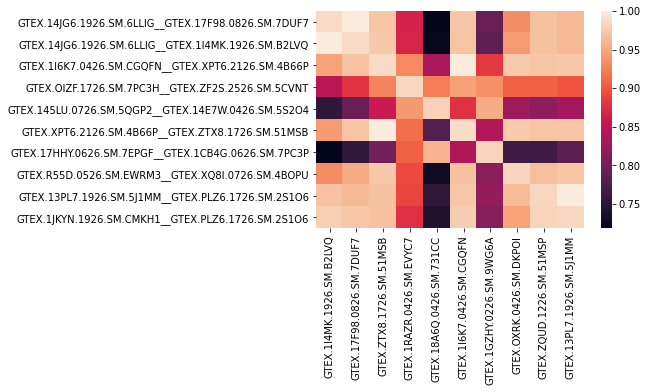

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(hm)
plt.show()

Cluster heatmaps are particularly helpful at identifying groups of correlated samples or genes. These groups are revealed as block structures along the diagonal and can identify outliers, tissue subtypes, and novel gene pathways 

There are 4 clusters - corner blocks of the heatmap are light colored (highly correlated) which voilates dependent and identically distributed (IID) assumptions made by most machine learning algorithms. These genes are  redundant predictors that may reduce predictive performance, increase computation time, or introduce collinearities that interfere with certain modeling techniques.

If the relevance of a single feature to the positive or negative class is known, other features in the same block structure are likely relevant to the same class. 